<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_calculus/task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy
from sympy import Symbol, symbols, S, Function, integrate, Integral, diff, solve

## Занятие 9
## Математический анализ
## Интегрирование функции: первообразная и неопределенный интеграл
https://docs.sympy.org/1.5.1/modules/integrals/integrals.html

https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B2%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BD%D0%B0%D1%8F

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D0%BB%D0%BE%D0%B2_%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9


### Задача 1.
Вычислить определенные интегралы:
$$
1)\ \int_2^3 \frac{1}{\sqrt{x-2}},\ 2) \int_1^6 \frac{1}{(x-1)^3},\ 3)\ \int_2^\infty \frac{1}{(x-1)^3}
$$

In [11]:
x = Symbol("x")

# 1
f = lambda x : 1 / sympy.sqrt(x - 2)
display(integrate(f(x), (x, 2, 3)))

# 2
f = lambda x : 1 / (x - 1) ** 3
display(integrate(f(x), (x, 1, 6)))

# 3
f = lambda x : 1 / (x - 1) ** 3
display(integrate(f(x), (x, 2, sympy.oo)))

2

oo

1/2


### Задача 2
Описать функцию, находящую неопределенный интеграл $\int f(x)\,dx$ в виде $F(x)+C$.

Использовать эту функцию для интегрирования $\sin(3x+5)$, $x{\rm tg}(x^2)$, $(e^{\sin x})\cos x$, $x^2e^{x^3}$

In [15]:
def indefinite_integral(f, x):
  C = symbols("C")
  return integrate(f(x), x) + C

x = symbols("x")

# 1
f = lambda x : sympy.sin(3*x + 5)
display(indefinite_integral(f, x))

# 2
f = lambda x : x * sympy.tan(x**2)
display(indefinite_integral(f, x))

# 3
f = lambda x : sympy.exp(sympy.sin(x)) * sympy.cos(x)
display(indefinite_integral(f, x))

# 4
f = lambda x : x ** 2 * sympy.exp(x ** 3)
display(indefinite_integral(f, x))

C - cos(3*x + 5)/3

C + log(tan(x**2)**2 + 1)/4

C + exp(sin(x))

C + exp(x**3)/3

### Задача 3.
Найти первообразную функции $\frac{x-3}{(x+1)^2}$, график которой проходит через начало координат.

In [25]:
x = Symbol("x")
C = Symbol("C")

f = lambda x : (x - 3) / (x + 1) ** 2

F = integrate(f(x), x) + C
display(F)

C0 = solve(sympy.Eq(F.subs(x, 0), 0), C)[0]
display(F.subs(C, C0))

C + log(x + 1) + 4/(x + 1)

log(x + 1) - 4 + 4/(x + 1)

### Задача 4.
Описать функцию, вычисляющую неопределенный интеграл от $\frac{1}{\sqrt{x^2+a}}$ по формуле "длинного логарифма":
$$
\int\frac{1}{\sqrt{x^2+a}} = \ln|x + \sqrt{x^2 + a}| + C,\quad a \neq 0.
$$
Функция возвращает $\ln|x| + C$ при $a = 0$. Аргументы функции - переменная интегрирования $x$ и параметр $a$.

Вызвать функцию при $a = 0, 1, 4$. Сравнить с результатом integrate.

Проверить дифференцированием, при необходимости использовать simplyfy для того, чтобы упростить выражение.

Рекомендется создавать положительные символы, чтобы не было неоднозначности.

In [42]:
def eval(x, a):
  C = Symbol("C")

  if a == S.Zero:
    return sympy.ln(x) + C

  return sympy.ln(abs(x + sympy.sqrt(x ** 2 + a))) + C

x = Symbol("x", positive=True)
a = Symbol("a", positive=True)
C = Symbol("C")

f = lambda x : 1 / sympy.sqrt(x ** 2 + a)

for a0 in [0, 1, 4]:
  F1 = eval(x, a0)
  F2 = integrate(f(x).subs(a, a0), x) + C

  display(F1, F2)

  assert sympy.simplify(F1.diff(x)) == sympy.simplify(F2.diff(x))

C + log(x)

C + log(x)

C + log(x + sqrt(x**2 + 1))

C + asinh(x)

C + log(x + sqrt(x**2 + 4))

C + asinh(x/2)

### Задача 5.
Провести замену переменной $y = x^2$ в интеграле $\int x e^{x^2}\,dx$.

In [43]:
x = Symbol("x")
y = Symbol("y")

I = Integral(x * sympy.exp(x ** 2))
display(sympy.Eq(I, I.transform(x ** 2, y)))

Eq(Integral(x*exp(x**2), x), Integral(exp(y)/2, y))

### Индивидуальное задание
Провести замену переменных в определенном интеграле, представить результат в виде двух уравнений, как в примере:
\begin{align*}
\int_1^4 \frac{dx}{\sqrt{x}\left(\sqrt{x}+1\right)} = \int_1^2 \frac{2\,dy}{y + 1}\\
\int_1^2 \frac{2\,dy}{y + 1} = 2(\ln 3 - \ln 2)
\end{align*}
(с точностью до перестановки слагаемых и сомножителей)
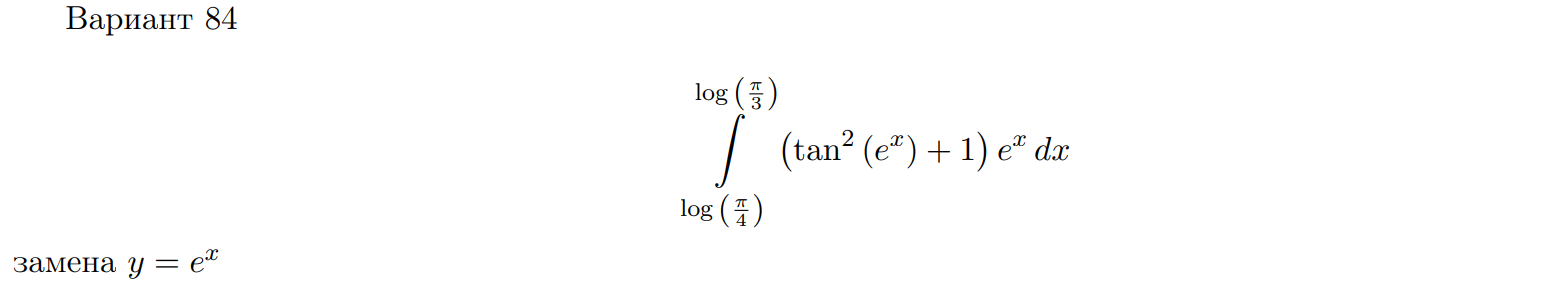

In [48]:
x = Symbol("x")
y = Symbol("y")

f = lambda x : (sympy.tan(sympy.exp(x)) ** 2 + 1) * sympy.exp(x)

I = Integral(f(x), (x, sympy.log(S.Pi / 3), sympy.log(S.Pi / 4)))
I1 = I.transform(sympy.exp(x), y)

display(sympy.Eq(I, I1))

display(sympy.Eq(I1, sympy.simplify(I1)))

Eq(Integral((tan(exp(x))**2 + 1)*exp(x), (x, log(pi/3), log(pi/4))), Integral(-tan(y)**2 - 1, (y, pi/4, pi/3)))

Eq(Integral(-tan(y)**2 - 1, (y, pi/4, pi/3)), 1 - sqrt(3))